In [1]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
# pd.options.display.html.table_schema = True
df1 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/1Bit_DB.csv")
df2 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/2Bits_DB.csv")
df3 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/3Bits_DB.csv")


In [2]:
df1 = df1[df1['n']<=3]
df3 = df3[df3['n']<=3]

In [3]:
df1_gb_std = df1.groupby(['K','n']).std().reset_index()
df2_gb_std = df2.groupby(['K','n']).std().reset_index()
df3_gb_std = df3.groupby(['K','n']).std().reset_index()
#combine the above two db 
df1_gb_std['Multi-bit'] = '1 Bit'
df2_gb_std['Multi-bit'] = '2 Bits'
df3_gb_std['Multi-bit'] = '3 Bits'
df_merge = pd.concat([df1_gb_std,df2_gb_std,df3_gb_std])
df_merge

,K,n,δ,A,up,Multi-bit
0,0.021,1.5,13.126291,0.0,0.538103,1 Bit
1,0.021,1.6,16.005632,0.0,0.595530,1 Bit
2,0.021,1.7,18.201142,0.0,0.599332,1 Bit
3,0.021,1.8,19.840090,0.0,0.600918,1 Bit
4,0.021,1.9,20.169112,0.0,0.590538,1 Bit
...,...,...,...,...,...,...
68,0.091,2.6,18.472283,0.0,0.471619,3 Bits
69,0.091,2.7,20.484798,0.0,0.493693,3 Bits
70,0.091,2.8,22.234648,0.0,0.511558,3 Bits
71,0.091,2.9,23.818590,0.0,0.517693,3 Bits


In [4]:
# color delta
df_merge
alt.Chart(df_merge).mark_point().encode(
    x='n',
    y='K',
    size='up',
    color=alt.Color('δ', scale=alt.Scale(scheme="blueorange")),
    column = 'Multi-bit'
)

alt.Chart(...)

In [6]:
# color delta
df_merge
alt.Chart(df_merge).mark_point().encode(
    x='n',
    y='K',
    size='δ',
    color=alt.Color('up', scale=alt.Scale(scheme="blueorange")),
    column = 'Multi-bit'
)

alt.Chart(...)

In [7]:
df1_gb_std
alt.Chart(df1_gb_std).mark_point().encode(
    x='n',
    y='K',
    size='up',
    color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
)

alt.Chart(...)

In [8]:
df3_gb_std
alt.Chart(df3_gb_std).mark_point().encode(
    x='n',
    y='K',
    size='up',
    color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
)

alt.Chart(...)

In [9]:
df2.groupby(['K','n']).mean().rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})

δ mean  A mean   up mean
K     n                                
0.011 1.5  291.470588    20.0  2.364706
      1.6  296.849315    20.0  2.087671
      1.7  307.012987    20.0  2.067532
      1.8  317.588235    20.0  2.056471
      1.9  326.542553    20.0  1.996809
...               ...     ...       ...
0.091 2.6  286.054217    20.0  2.305422
      2.7  290.468750    20.0  2.263021
      2.8  294.236111    20.0  2.222222
      2.9  296.431624    20.0  2.180769
      3.0  297.802419    20.0  2.137500

[73 rows x 3 columns]

In [10]:
df2.groupby(['K','n']).std().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})

δ std  A std    up std
K     n                              
0.011 1.5  10.014695    0.0  0.429336
      1.6  13.781702    0.0  0.584747
      1.7  14.873584    0.0  0.608588
      1.8  15.991288    0.0  0.604831
      1.9  15.692382    0.0  0.579665
...              ...    ...       ...
0.091 2.6  22.024850    0.0  0.480688
      2.7  23.669608    0.0  0.496097
      2.8  25.159857    0.0  0.514774
      2.9  26.069024    0.0  0.528921
      3.0  26.467253    0.0  0.545950

[73 rows x 3 columns]

In [11]:
dff = df2.groupby(['K','n']).agg(['mean', 'std'])#.rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})[["δ mean", "up mean"]]
dff

δ                A             up          
                 mean        std  mean  std      mean       std
K     n                                                        
0.011 1.5  291.470588  10.014695  20.0  0.0  2.364706  0.429336
      1.6  296.849315  13.781702  20.0  0.0  2.087671  0.584747
      1.7  307.012987  14.873584  20.0  0.0  2.067532  0.608588
      1.8  317.588235  15.991288  20.0  0.0  2.056471  0.604831
      1.9  326.542553  15.692382  20.0  0.0  1.996809  0.579665
...               ...        ...   ...  ...       ...       ...
0.091 2.6  286.054217  22.024850  20.0  0.0  2.305422  0.480688
      2.7  290.468750  23.669608  20.0  0.0  2.263021  0.496097
      2.8  294.236111  25.159857  20.0  0.0  2.222222  0.514774
      2.9  296.431624  26.069024  20.0  0.0  2.180769  0.528921
      3.0  297.802419  26.467253  20.0  0.0  2.137500  0.545950

[73 rows x 6 columns]

In [12]:
# experimental data
dfe = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/param_db/para_s4.csv")
dfe

,repressor,RBS,Y_min,Y_max,K,n
0,AmeR,F1,0.200,3.8,0.09,1.4
1,AmtR,A1,0.060,3.8,0.07,1.6
2,BetI,E1,0.070,3.8,0.41,2.4
3,BM3R1,B1,0.004,0.5,0.04,3.4
4,BM3R1,B2,0.005,0.5,0.15,2.9
5,BM3R1,B3,0.010,0.8,0.26,3.4
6,HlyIIR,H1,0.070,2.5,0.19,2.6
7,IcaRA,I1,0.080,2.2,0.10,1.4
8,LitR,l1,0.070,4.3,0.05,1.7
9,LmrA,N1,0.200,2.2,0.18,2.1


In [13]:
# load bits database with n and up wider range.
# K = 0.011: 0.02:0.1, n = 1.5:0.1:5., δ = 250:5:350, A = 20., up = 1:0.2:10, Δ0 = 5000.
df2_n5up10 = pd.read_csv("/Users/chentianchi/Desktop/DB_gen/2bit/2Bits_DB.csv")
df2_n5up10



,K,n,δ,A,up
0,0.011,1.5,270.0,20.0,1.6
1,0.011,1.5,275.0,20.0,1.6
2,0.011,1.5,275.0,20.0,1.8
3,0.011,1.5,280.0,20.0,1.8
4,0.011,1.5,280.0,20.0,2.0
...,...,...,...,...,...
21310,0.091,5.0,350.0,20.0,3.4
21311,0.091,5.0,350.0,20.0,3.6
21312,0.091,5.0,350.0,20.0,3.8
21313,0.091,5.0,350.0,20.0,4.0


In [14]:
df2_n5up10_gb_std = df2_n5up10.groupby(['K','n']).std().reset_index()
alt.Chart(df2_n5up10_gb_std).mark_point().encode(
    x='n',
    y='K',
    size='up',
    color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
)

alt.Chart(...)

In [15]:
alt.Chart(df2_n5up10_gb_std).mark_rect().encode(
    alt.X('n:N'),
    alt.Y('K:N',sort=alt.EncodingSortField('K', order='descending')),
    alt.Color('δ:Q', scale=alt.Scale(scheme='blueorange'))
)

alt.Chart(...)

In [16]:
df2_n5up10_gb_mean = df2_n5up10.groupby(['K','n']).mean().reset_index()
alt.Chart(df2_n5up10_gb_mean).mark_point().encode(
    x='n',
    y='K',
    size='up',
    color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
)
df2_n5up10_gb_mean

,K,n,δ,A,up
0,0.011,1.5,323.342857,20.0,5.899429
1,0.011,1.6,325.520833,20.0,4.783333
2,0.011,1.7,325.891089,20.0,3.483168
3,0.011,1.8,327.291667,20.0,2.719444
4,0.011,1.9,329.196429,20.0,2.167857
...,...,...,...,...,...
154,0.091,4.6,315.757576,20.0,2.174545
155,0.091,4.7,315.437500,20.0,2.133750
156,0.091,4.8,315.348101,20.0,2.103797
157,0.091,4.9,315.348101,20.0,2.075949


In [17]:
alt.Chart(df1).transform_density(
     'δ',
    as_ = ['δ', 'density'],
    bandwidth=2,
    extent= [200, 400]
).mark_area().encode(
    alt.X('δ:Q'),
    alt.Y('density:Q'),
).properties(width=300, height=50)

alt.Chart(...)

In [18]:
alt.Chart(df2).transform_density(
     'δ',
    as_ = ['δ', 'density'],
    bandwidth=2,
    extent= [200, 400]
).mark_area().encode(
    alt.X('δ:Q'),
    alt.Y('density:Q'),
).properties(width=300, height=50)

alt.Chart(...)

In [19]:
alt.Chart(df3).transform_density(
     'δ',
    as_ = ['δ', 'density'],
    bandwidth=2,
    extent= [200, 400]
).mark_area().encode(
    alt.X('δ:Q'),
    alt.Y('density:Q'),
).properties(width=300, height=50)

alt.Chart(...)

## Test Df for wider range paramters

In [21]:
import pandas as pd
import altair as alt
# Test wider range for 1 bit couner
# df1_test = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/1Bit_DB_test.csv")
df1_test = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/1Bit_DB_(K = 0.01: 0.05:1., n = 1.:0.2:10., δ = 10:5:500, A = 20., up = 1:1.:10).csv")
df2_test = pd.read_csv("/Users/chentianchi/Downloads/C2_wr_v2_20200619_045516/filesys/2Bits_DB_wr_v2.csv")
# df1_test = df1_test[df1_test.K <0.1]
df1_test;df2_test

,K,n,δ,A,up
0,0.01,1.4,285.0,20.0,3.0
1,0.01,1.4,290.0,20.0,3.0
2,0.01,1.4,295.0,20.0,4.0
3,0.01,1.4,300.0,20.0,4.0
4,0.01,1.4,305.0,20.0,4.0
...,...,...,...,...,...
105621,0.96,10.0,490.0,20.0,5.0
105622,0.96,10.0,490.0,20.0,6.0
105623,0.96,10.0,495.0,20.0,5.0
105624,0.96,10.0,495.0,20.0,6.0


In [21]:
# ------- 1bit counter
df1_test_mean = df1_test.groupby(['K','n']).mean().reset_index().rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})
df1_test_std = df1_test.groupby(['K','n']).std().reset_index().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})

# ------- 2bit counter
df2_test_mean = df2_test.groupby(['K','n']).mean().reset_index().rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})
df2_test_std = df2_test.groupby(['K','n']).std().reset_index().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})
# alt.Chart(df1_test_mean).mark_point().encode(
#     x='n',
#     y='K',
#     size='δ',
#     color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
# )
δ_mean_1bit_plt =  alt.Chart(df1_test_mean).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=70)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    alt.Color('δ mean:Q', scale=alt.Scale(scheme='blueorange'))
)

δ_mean_2bit_plt =  alt.Chart(df2_test_mean).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=70)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    alt.Color('δ mean:Q', scale=alt.Scale(scheme='blueorange'))
)
δ_mean_2bit_plt

alt.Chart(...)

In [22]:
# alt.Chart(df1_test_mean).mark_rect().encode(
#     x='n:O',
#     y='K:O',
#     color=alt.Color('δ', scale=alt.Scale(scheme="blueorange"))
# )

δ_std_1bit_plt = alt.Chart(df1_test_std).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=70)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    alt.Color('δ std:Q', scale=alt.Scale(scheme='blueorange'))
)

δ_std_2bit_plt = alt.Chart(df2_test_std).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=70)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    alt.Color('δ std:Q', scale=alt.Scale(scheme='blueorange'))
)
δ_std_2bit_plt

alt.Chart(...)

In [23]:
alt.Chart(df1_test_std).transform_density(
     'δ std',
    as_ = ['δ std', 'density'],
    bandwidth=10.0,
    extent= [0, 150]
).mark_area().encode(
    alt.X('δ std:Q'),
    alt.Y('density:Q'),
).properties(width=300, height=50)

alt.Chart(...)

In [24]:
alt.Chart(df1_test_mean).transform_density(
     'δ mean',
    as_ = ['δ mean', 'density'],
    bandwidth=10.0,
    extent= [0, 550]
).mark_area().encode(
    alt.X('δ mean:Q'),
    alt.Y('density:Q'),
).properties(width=300, height=50)

alt.Chart(...)

In [25]:
df1_test_merge = pd.merge(df1_test_mean,df1_test_std)
df2_test_merge = pd.merge(df2_test_mean,df2_test_std)

df1_test_merge;df2_test_merge

,K,n,δ mean,A mean,up mean,δ std,A std,up std
0,0.01,1.4,322.500000,20.0,7.000000,15.698044,0.0,2.190890
1,0.01,1.6,337.750000,20.0,6.000000,25.266528,0.0,2.717465
2,0.01,1.8,365.882353,20.0,5.960784,30.326653,0.0,2.785396
3,0.01,2.0,400.066667,20.0,6.106667,35.900513,0.0,2.709210
4,0.01,2.2,433.884298,20.0,6.082645,42.654072,0.0,2.666417
...,...,...,...,...,...,...,...,...
832,0.96,9.2,280.590909,20.0,6.809091,92.686044,0.0,2.148161
833,0.96,9.4,280.590909,20.0,6.809091,92.686044,0.0,2.148161
834,0.96,9.6,280.810811,20.0,6.828829,92.292865,0.0,2.148462
835,0.96,9.8,280.810811,20.0,6.828829,92.292865,0.0,2.148462


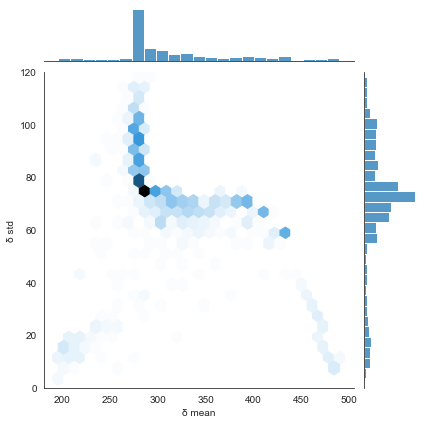

In [26]:
# Hex density plot for 1bit and 2bit
import seaborn as sns
sns.set_style(style = "white")
# sns.violinplot(x="K", y = "n",hue="δ mean",data=df1_test_merge, palette="Pastel1")
# sns.jointplot(x=df1_test_merge["δ mean"], y=df1_test_merge["δ std"], kind='kde')
plt=sns.jointplot(x=df1_test_merge["δ mean"], y=df1_test_merge["δ std"], ylim=[0,120], kind='hex')
# plt.savefig("./mean_vs_std.png")
plt

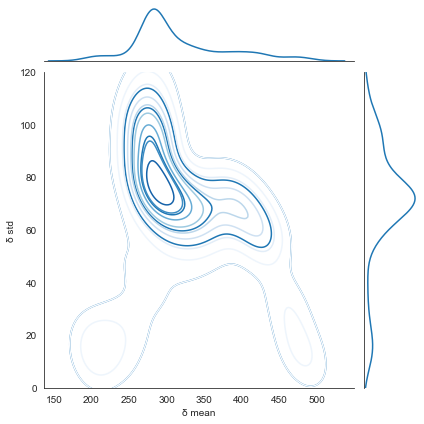

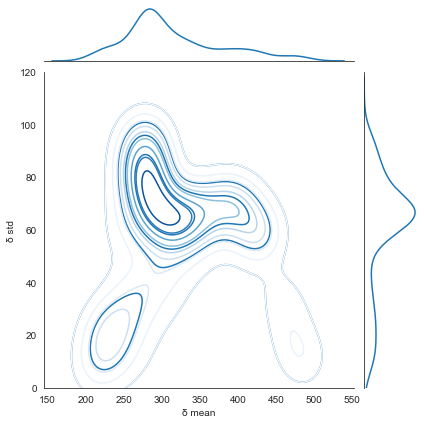

In [32]:
# different style of the δ mean vs δ std plot

g1 = (sns.jointplot(x=df1_test_merge["δ mean"], y=df1_test_merge["δ std"], ylim=[0,120],
                   shade=False,cmap="Blues",bw_method='scott',
                 data=df1_test_merge,kind='kde')
    .plot_joint(sns.kdeplot, zorder=0, n_levels=5))
# g1.savefig("./mean_vs_std_1b_v2.png", dpi = 400)

g2 = (sns.jointplot(x=df2_test_merge["δ mean"], y=df2_test_merge["δ std"], ylim=[0,120],
                   shade=False,cmap="Blues",bw_method='scott',
                 data=df1_test_merge,kind='kde')
    .plot_joint(sns.kdeplot, zorder=0, n_levels=5))
# g2.savefig("./mean_vs_std_2b_v2.png", dpi = 400)

<AxesSubplot:xlabel='δ mean', ylabel='δ std'>

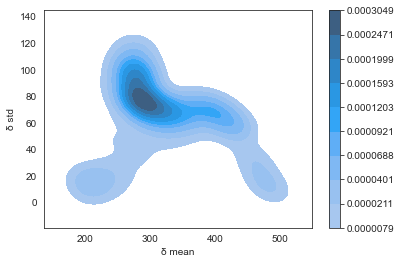

In [42]:
sns.kdeplot(
    data=df1_test_merge, x="δ mean", y="δ std", fill=True,cbar = True,
  
)

# Below are the code for generating the contour plot for (n,K) with delta mean and std

In [7]:
# plot contour for the delta mean for 1bit and ....
import numpy as np
dataframe = df1_test_std
X_unique = np.sort(dataframe.n.unique())
Y_unique = np.sort(dataframe.K.unique())
X, Y = np.meshgrid(X_unique, Y_unique)
Z = dataframe.pivot_table(index='n', columns='K', values='δ std').T.values

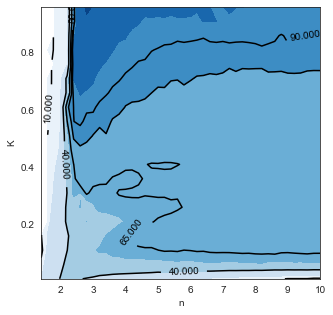

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Define levels in z-axis where we want lines to appear
# levels = np.array([260,280,300,320,360,400,450]) # this level is for δ mean
levels = np.array([10,40,65,80,90]) # this level is for δ std

# Generate a color mapping of the levels we've specified
import matplotlib.cm as cm # matplotlib's color map library
cpf = ax.contourf(X,Y,Z, len(levels), cmap=cm.Blues)

# Set all level lines to black
line_colors = ['black' for l in cpf.levels]

# Make plot and customize axes
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
# plt.xticks([0,0.5,1])
# plt.yticks([0,0.5,1])
ax.set_xlabel('n')
_ = ax.set_ylabel('K')
# plt.savefig("1bit_δstd.png", dpi=400) # remember to change the saved file name

/Users/chentianchi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chentianchi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 38.,  44.,  19.,  19.,  80., 304., 173., 103.,  63.,  17.]),
 array([  3.53553391,  15.39277365,  27.25001339,  39.10725313,
         50.96449287,  62.82173261,  74.67897235,  86.53621209,
         98.39345183, 110.25069157, 122.10793131]),
 <a list of 10 Patch objects>)

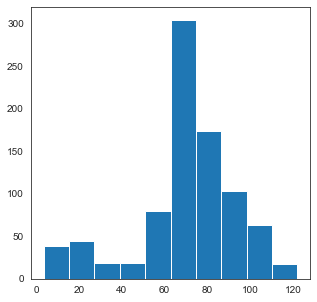

In [18]:
zz = Z.tolist()
zz
plt.hist(sum(zz, []))

## δ and up plot for figure 19

In [9]:
# two data set with wider n,K ranges
df1_test
df2_test
# calculate standard deviation of the δ
df1_test_gb_std = df1_test.groupby(['K','n']).std().reset_index().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})
df2_test_gb_std = df2_test.groupby(['K','n']).std().reset_index().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})
#combine the above two db 
df1_test_gb_std['Multi-bit'] = '1 Bit'
df2_test_gb_std['Multi-bit'] = '2 Bits'
df_merge = pd.concat([df1_test_gb_std,df2_test_gb_std])

# plot 
pp1 = alt.Chart(df1_test_gb_std, title = "1-bit counter").mark_circle().encode(
#     x='n:O',
#     y='K:Q',
    alt.X('n:Q', bin=alt.Bin(maxbins=50)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    size='up std',
    color=alt.Color('δ std', scale=alt.Scale(scheme="blueorange", domain=[0, 120])),
#     column = 'Multi-bit'
)
pp2 = alt.Chart(df2_test_gb_std, title = "2-bit counter").mark_circle().encode(
#     x='n:N',
#     y='K:Q',
    alt.X('n:Q', bin=alt.Bin(maxbins=50)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    size='up std',
    color=alt.Color('δ std', scale=alt.Scale(scheme="blueorange",domain=[0, 120])),
#     column = 'Multi-bit'
)
pp1
pp2

alt.Chart(...)

In [10]:
# experimental data
dfe = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/param_db/para_s4.csv")
dfy = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/param_db/para_y.csv")
dfe["species"] = "E.coli"
dfe = dfe[["repressor","K","n","species"]]
dfy["species"] = "Yeast"
dfy = dfy[["repressor","K","n","species"]]
df_exp = pd.concat([dfe,dfy],ignore_index=True)
df_exp

,repressor,K,n,species
0,AmeR,0.09,1.40,E.coli
1,AmtR,0.07,1.60,E.coli
2,BetI,0.41,2.40,E.coli
3,BM3R1,0.04,3.40,E.coli
4,BM3R1,0.15,2.90,E.coli
5,BM3R1,0.26,3.40,E.coli
6,HlyIIR,0.19,2.60,E.coli
7,IcaRA,0.10,1.40,E.coli
8,LitR,0.05,1.70,E.coli
9,LmrA,0.18,2.10,E.coli


In [35]:
pe = alt.Chart(df_exp).mark_point().encode(
    x=alt.X('n', axis=alt.Axis( title='n')),
    y=alt.Y('K', axis=alt.Axis( title='K')),
#     alt.X('n:N', bin=alt.Bin(maxbins=50)),
#     alt.Y('K:Q', bin=alt.Bin(maxbins=45)),
    color =alt.Color("species:N", scale=alt.Scale(domain =['E.coli', 'Yeast'], range = ['purple', 'green'])),
#     shape = 'species'
)
pe

alt.Chart(...)

In [36]:
chart1 = alt.layer(pp1,pe)
chart2 = alt.layer(pp2,pe)

In [37]:
chart1 | chart2

alt.HConcatChart(...)

In [13]:
# dfe.iloc[10::,:]
# dfe.iloc[0:10:,:]

,repressor,RBS,Y_min,Y_max,K,n
0,AmeR,F1,0.200,3.8,0.09,1.4
1,AmtR,A1,0.060,3.8,0.07,1.6
2,BetI,E1,0.070,3.8,0.41,2.4
3,BM3R1,B1,0.004,0.5,0.04,3.4
4,BM3R1,B2,0.005,0.5,0.15,2.9
5,BM3R1,B3,0.010,0.8,0.26,3.4
6,HlyIIR,H1,0.070,2.5,0.19,2.6
7,IcaRA,I1,0.080,2.2,0.10,1.4
8,LitR,l1,0.070,4.3,0.05,1.7
9,LmrA,N1,0.200,2.2,0.18,2.1


## For 3bit counter data

In [1]:
import pandas as pd
import altair as alt

df3_rest = pd.read_csv("/Users/chentianchi/Desktop/Local_test/C3_wr_v2_test/3Bits_DB_wr_v2_rest.csv")
df3_rest

,K,n,δ,A,up
0,0.06,9.0,390.0,20.0,2.0
1,0.06,9.0,390.0,20.0,3.0
2,0.06,9.0,395.0,20.0,2.0
3,0.06,9.0,395.0,20.0,3.0
4,0.06,9.0,400.0,20.0,2.0
...,...,...,...,...,...
3963,0.56,9.2,390.0,20.0,10.0
3964,0.56,9.4,390.0,20.0,10.0
3965,0.56,9.6,390.0,20.0,10.0
3966,0.56,9.8,390.0,20.0,10.0


In [10]:
# ------- 3bit counter
df3_rest_mean = df3_rest.groupby(['K','n']).mean().reset_index().rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})

δ_mean_1bit_plt =  alt.Chart(df3_rest_mean).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=6)),
    alt.Y('K:Q', bin=alt.Bin(maxbins=15)),
    alt.Color('δ mean:Q', scale=alt.Scale(scheme='blueorange'))
)
δ_mean_1bit_plt

alt.Chart(...)

# 3 Bit counter run final (combining datasets)

In [3]:
import pandas as pd
import altair as alt
df3_1_2 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new1.csv")
df3_2_3 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new2.csv")
df3_3_4 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new3.csv")
df3_4_5 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new4.csv")
df3_5_6 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new5.csv")
df3_6_7 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new6.csv")
df3_7_8 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new7.csv")
df3_8_9 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new8.csv")
df3_9_10 = pd.read_csv("/Users/chentianchi/Desktop/code/circuit design/DEmodels/scripts_modi/3bit_counter_data_gen/3Bits_DB_new9.csv")

,K,n,δ,A,up
0,0.01,9.2,475.0,20.0,1.0
1,0.01,9.2,480.0,20.0,1.0
2,0.01,9.2,485.0,20.0,1.0
3,0.01,9.2,490.0,20.0,1.0
4,0.01,9.2,495.0,20.0,1.0
...,...,...,...,...,...
13709,0.96,10.0,300.0,20.0,10.0
13710,0.96,10.0,305.0,20.0,9.0
13711,0.96,10.0,305.0,20.0,10.0
13712,0.96,10.0,310.0,20.0,10.0


In [4]:
df3 = pd.concat([df3_1_2, df3_2_3, df3_3_4, df3_4_5, df3_5_6, df3_6_7,df3_7_8,df3_8_9,df3_9_10],ignore_index=True)
df3

,K,n,δ,A,up
0,0.01,1.4,295.0,20.0,4.0
1,0.01,1.4,305.0,20.0,5.0
2,0.01,1.4,310.0,20.0,6.0
3,0.01,1.4,315.0,20.0,7.0
4,0.01,1.4,320.0,20.0,8.0
...,...,...,...,...,...
94651,0.96,10.0,300.0,20.0,10.0
94652,0.96,10.0,305.0,20.0,9.0
94653,0.96,10.0,305.0,20.0,10.0
94654,0.96,10.0,310.0,20.0,10.0


In [6]:

# ------- 2bit counter
df3_mean = df3.groupby(['K','n']).mean().reset_index().rename(columns={"δ": "δ mean", "A":"A mean", "up": "up mean"})
df3_std = df3.groupby(['K','n']).std().reset_index().rename(columns={"δ": "δ std","A":"A std", "up": "up std"})

δ_mean_3bit_plt =  alt.Chart(df3_mean).mark_rect().encode(
    alt.X('n:Q', bin=alt.Bin(maxbins=70)),
    alt.Y('K:Q',bin=alt.Bin(maxbins=45)),
    alt.Color('δ mean:Q', scale=alt.Scale(scheme='blueorange'))
)
δ_mean_3bit_plt

alt.Chart(...)